In [22]:
import pandas as pd
import numpy as np
df=pd.read_csv("clean_train.csv",header=0)

<class 'pandas.core.frame.DataFrame'>


In [2]:
comment=df["comment_text"].values
print(comment[0])
#words = comment[0].split()

ExplanationWhy edit make username Hardcore Metallica Fan reverted? They vandalisms, closure GAs I vote New York Dolls FAC. And please remove template talk page since I'm retire now.89.205.38.27


In [55]:
def feature(comment):
    words = comment.split()
    upper=0
    title=0
    star=0
    exclamation=0
    ls=[]
    star_mark="*"
    exclamation_mark="!!"
    if len(words)>35:
        words35=1
    else:
        words35=0
    
    for i in words:
        if i!="I" and i.isupper():
            upper+=1
        if i!="I" and i.istitle():
            title+=1
        if star_mark in i:
            star+=1
        if exclamation_mark in i:
            exclamation+=1
    ls.append(comment)
    ls.append(words35)
    ls.append(upper/len(words))
    ls.append(title/len(words))
    ls.append(star)
    ls.append(exclamation)
    return ls

In [56]:
from tqdm import tqdm
ls = []
for i in tqdm(range(0,len(comment))):
    ls.append(feature(comment[i]))
print(ls[0:10])

100%|██████████| 159571/159571 [00:03<00:00, 41148.33it/s]

[["ExplanationWhy edit make username Hardcore Metallica Fan reverted? They vandalisms, closure GAs I vote New York Dolls FAC. And please remove template talk page since I'm retire now.89.205.38.27", 0, 0.03571428571428571, 0.2857142857142857, 0, 0], ["D'aww! He match background colour I'm seemingly stick with. Thanks. (talk) 21:51, January 11, 2016 (UTC)", 0, 0.0625, 0.1875, 0, 0], ["Hey man, I'm really try edit war. It's guy constantly remove relevant information talk edit instead talk page. He seem care format actual info.", 0, 0.0, 0.08333333333333333, 0, 0], ['"MoreI can\'t make real suggestions improvement - I wonder section statistics later on, subsection ""types accidents"" -I think reference may need tidy exact format ie date format etc. I later on, no-one else first - preferences format style reference want please let know.There appear backlog article review I guess may delay reviewer turn up. It\'s list relevant form eg Wikipedia:Good_article_nominations#Transport "', 1, 0.01

In [57]:
array=np.array(ls).reshape(len(comment),6)

In [58]:
dataFrame = pd.DataFrame(array,columns=['comment_text','length35','upper','title','star','exclamation'])

In [59]:
#del dataFrame["comment_text"]
DF=dataFrame.loc[:,['length35','upper','title','star','exclamation']]
DF1=df.loc[:,['toxic','severe_toxic','obscene','threat','insult','identity_hate']]
df2 = pd.concat([DF1,DF],axis =1 )

In [60]:
df2.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,length35,upper,title,star,exclamation
0,0,0,0,0,0,0,0,0.03571428571428571,0.2857142857142857,0,0
1,0,0,0,0,0,0,0,0.0625,0.1875,0,0
2,0,0,0,0,0,0,0,0.0,0.08333333333333333,0,0
3,0,0,0,0,0,0,1,0.01639344262295082,0.01639344262295082,0,0
4,0,0,0,0,0,0,0,0.0,0.2222222222222222,0,0


In [61]:
df2.to_csv('newfeature.csv')

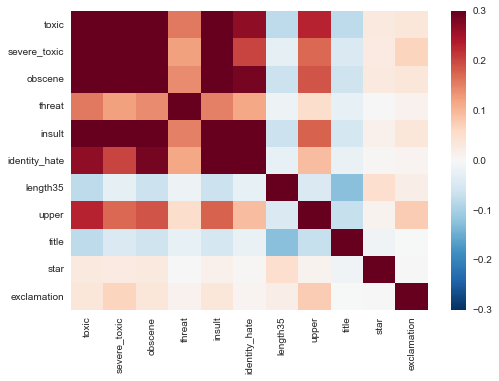

In [71]:
import seaborn as sns
from matplotlib import pyplot as plt
df3=pd.read_csv('newfeature.csv',header=0)
corr=df3.corr()
sns.heatmap(corr.iloc[1:,1:], vmin=-0.3, vmax=0.3, center=0.0)
sns.plt.show()